In [21]:
# https://bnext2.typeform.com/to/K2JiqU

# bnex test https://drive.google.com/drive/folders/1BfKrBxhJpPs1Jzfj9DVrLtif2V_Nj-Sd

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
def extract(path): 
    return pd.read_csv(path)

def transform(df): 
    # date
    df['date'] = pd.to_datetime(df.date)    
    return df

df = extract('./input/data_exports_data_test_181212.csv')
df = transform(df)
df.head()

,user_id,amount,category,date
0,jcbvas-raczml-ghjpyi,7.500,Purchase,2018-12-01 07:58:39
1,nscvb-jlazc-kihpj,0.000,Purchase,2018-12-01 07:58:27
2,aavoq-mmzuy-yypqt,125.000,Topup TPV,2018-12-01 07:57:50
3,jjiiav-rrggmz-ggxxyp,845.000,Purchase,2018-12-01 07:57:46
4,nqsoc-jylua-ktiqh,1009.925,Topup TPV,2018-12-01 07:57:16


In [23]:
# quitamos el ´ultimo día y el primero xq no están enteros, o agrupar de 8 a 8 y agrupar

df.date.max(), df.date.min()

(Timestamp('2018-12-01 07:58:39'), Timestamp('2018-11-20 07:59:18'))

## PREGUNTA 1: 
La primera pregunta tiene que ver con los usuarios que han gastado en este periodo. ¿Se te ocurre alguna manera de agrupar a los usuarios en función de su valor? Explica por favor la razón de agruparlos de la manera elegida y los cálculos que has realizado para ello.

In [25]:
"""
Los agrupo en función de si gastan más de lo que ingresan ya que Bnex puede usar esta información
para ofrecer préstamos. 

Para ello obtengo el total de cada una de las operaciones para cada usuario y calculo el total. 
Si gasta más de lo que ingresa se pone balance_pos en False, o True si el balance sale positivo. 
"""

def balance(df): 
    pivot = pd.pivot_table(df, values='amount', index=['user_id'], columns=['category'], aggfunc=np.sum).fillna(0)
    pivot['balance'] = pivot['Topup TPV'] - pivot['Purchase'] - pivot['Bnext Send Money']
    pivot['balance_pos'] = np.where(pivot['balance'] > 0, True, False)
    return pivot

# remove outliers
def remove_outlier(df_in, col_name):
    VALUE = 1.5
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q1 - VALUE*iqr
    fence_high = q3 + VALUE*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

df_wo_outliers = remove_outlier(df, 'amount')
"""
df_day = df_wo_outliers.groupby(['day_of_month', 'category']).sum()
df_day.reset_index(inplace=True)
sns.lineplot(x="day_of_month", y="amount",
             hue="category", 
             data=df_day)

"""
pivot = balance(df_wo_outliers)
pivot.head(10)

category,Bnext Send Money,Purchase,Topup TPV,balance,balance_pos
user_id,,,,,
aaaas-mmmml-yyyyi,0.0,24.950,0.0,-24.950,False
aaabb-mmmcc-yyyjj,0.0,5.000,0.0,-5.000,False
aaaca-mmmam-yyyhy,0.0,350.600,400.0,49.400,True
aaaci-mmmag-yyyhx,0.0,102.450,0.0,-102.450,False
aaacn-mmmaj-yyyhk,0.0,205.125,0.0,-205.125,False
aaaco-mmmau-yyyhq,0.0,124.425,0.0,-124.425,False
aaacs-mmmal-yyyhi,0.0,142.125,77.5,-64.625,False
aaaia-mmmgm-yyyxy,0.0,23.900,125.0,101.100,True
aaaii-mmmgg-yyyxx,0.0,106.250,0.0,-106.250,False


In [ ]:
# KNN para ver el num de grupos cambiando de n, KMEANS, LDA (latend discriminant analysis)
from sklearn.cluster import KMeans

df3d = pivot[['Bnext Send Money', 'Purchase', 'Topup TPV']]
X = np.array(df3d)


kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

y_pred = kmeans.labels_

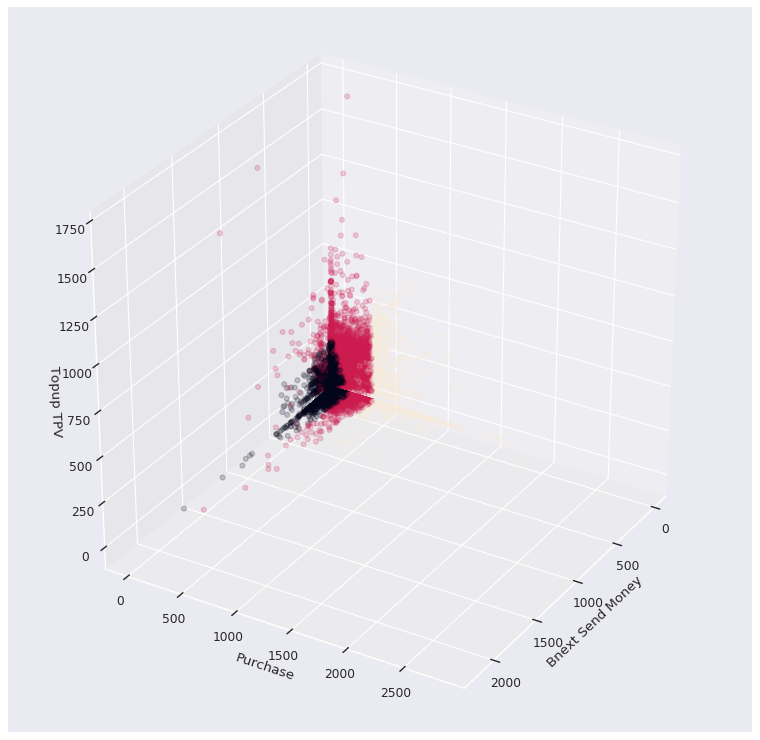

In [49]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 31)
ax.set_xlabel(df3d.columns[0])
ax.set_ylabel(df3d.columns[1])
ax.set_zlabel(df3d.columns[2])

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_pred, alpha=0.33, cmap=)

**SOLUCIÓN**: Agrupamos los usuarios en función de su balance en el periodo de tiempo. Si es positivo o negativo. 

## PREGUNTA 2: 
Te pregunta el CEO que no entiende la evolución de los datos en el periodo escogido, que le parece algo anómala. ¿Encuentras algún patrón que permita encontrar outliers? Esta es una pregunta abierta, puedes analizar los datos de la manera que quieras. 

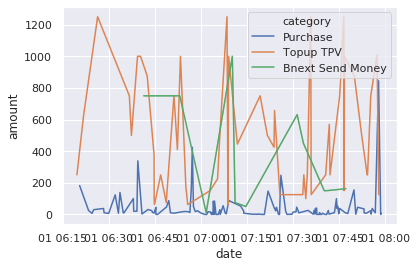

In [28]:
# boxplot con iqr
import seaborn as sns
sns.set(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="date", y="amount",
             hue="category",
             data=df.head(200))


In [11]:
# pivot_date = pd.pivot_table(df, values='amount', index=['date'], columns=['category'], aggfunc=np.sum).fillna(0)


In [12]:
# pivot_date.head()

In [13]:
df['day_of_month'] = df.date.apply(lambda x: x.day)
df['day_of_month'] = np.where(df['day_of_month']==1, 31, df['day_of_month'])
df.head()


,user_id,amount,category,date,day_of_month
0,jcbvas-raczml-ghjpyi,7.500,Purchase,2018-12-01 07:58:39,31
1,nscvb-jlazc-kihpj,0.000,Purchase,2018-12-01 07:58:27,31
2,aavoq-mmzuy-yypqt,125.000,Topup TPV,2018-12-01 07:57:50,31
3,jjiiav-rrggmz-ggxxyp,845.000,Purchase,2018-12-01 07:57:46,31
4,nqsoc-jylua-ktiqh,1009.925,Topup TPV,2018-12-01 07:57:16,31


In [14]:
df_day = df.groupby(['day_of_month', 'category']).sum()
df_day.head(30)

amount
day_of_month category                     
20           Bnext Send Money   119722.375
             Purchase           317942.850
             Topup TPV          645554.375
21           Bnext Send Money   141931.050
             Purchase           367355.200
             Topup TPV          787869.775
22           Bnext Send Money   252498.975
             Purchase           445351.925
             Topup TPV         1000562.775
23           Bnext Send Money   241472.150
             Purchase          1470355.275
             Topup TPV         1806325.350
24           Bnext Send Money   192534.425
             Purchase           588330.775
             Topup TPV          859111.750
25           Bnext Send Money   156495.625
             Purchase           408996.650
             Topup TPV          722850.300
26           Bnext Send Money   176184.100
             Purchase           482462.250
             Topup TPV          793488.250
27           Bnext Send Money   218802.775
             Purchase           377132.625
             Topup TPV          860243.450
28           Bnext Send Money   223338.900
             Purchase           416700.375
             Topup TPV          981437.350
29           Bnext Send Money   248775.775
             Purchase           435487.250
             Topup TPV         1006973.875

In [15]:
df_day.reset_index(inplace=True)


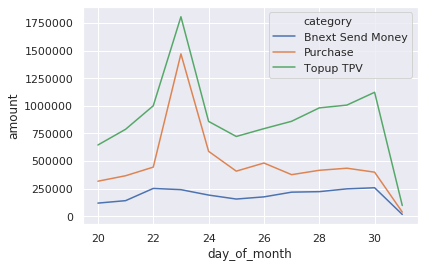

In [16]:
sns.lineplot(x="day_of_month", y="amount",
             hue="category", 
             data=df_day)

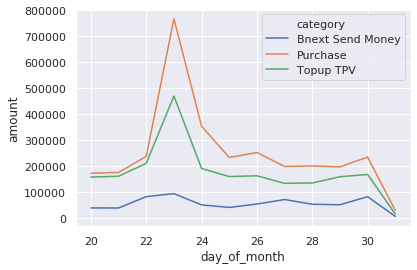

In [17]:
# remove outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q1 - 1.5*iqr
    fence_high = q3 + 1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

df_wo_outliers = remove_outlier(df, 'amount')
df_day = df_wo_outliers.groupby(['day_of_month', 'category']).sum()
df_day.reset_index(inplace=True)
sns.lineplot(x="day_of_month", y="amount",
             hue="category", 
             data=df_day)

In [18]:
# El pico del 23 de Noviembre es el Black Friday. 
# No ocurren compras más grandes sino que más compras de las mismas cantidades. 

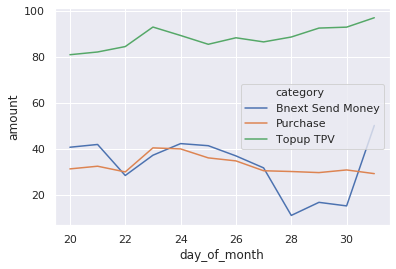

In [19]:
# ahora agrupamos por la media en vez de la suma. 

df_wo_outliers = remove_outlier(df, 'amount')
df_day = df_wo_outliers.groupby(['day_of_month', 'category']).mean()
df_day.reset_index(inplace=True)
sns.lineplot(x="day_of_month", y="amount",
             hue="category", 
             data=df_day)

## PREGUNTA 3 (opcional): 
Busca el concepto de cohorte si no estás familiarizadx con él, y realiza un análisis de cohortes diarias. Puedes considerar que la primera transacción de cada usuario en la muestra fue su primera transacción en Bnext. 

In [20]:
# agrupar por amount 
# agrupar por día y hacer diagrma de barras con 3 elementos cada una. 